In [41]:
import numpy as np
import scipy.sparse as sp
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [42]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
    
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
np.random.seed(42)
nb_assets = 10
mean_return_assets = np.random.randn(nb_assets, 1)
covariance_assets = np.random.randn(nb_assets , nb_assets)
covariance_assets = covariance_assets.T.dot(covariance_assets)

# Long only portfolio optimization
weights_assets = cp.Variable(nb_assets)
risk_aversion_parameter = cp.Parameter(nonneg=True)

return_portfolio = mean_return_assets.T @ weights_assets

risk_portfolio = cp.quad_form(
    weights_assets, 
    covariance_assets
)

problem = cp.Problem(
    cp.Maximize(return_portfolio - risk_aversion_parameter * risk_portfolio),
    [cp.sum(weights_assets) == 1, weights_assets >= 0]
)

In [44]:
num_samples = 100
return_values = np.zeros(num_samples)
risk_values = np.zeros(num_samples)
risk_aversion_values = np.logspace(-2, 3, num_samples)

for i, risk_aversion in enumerate(risk_aversion_values):
    risk_aversion_parameter.value = risk_aversion
    problem.solve()
    return_values[i] = return_portfolio.value
    risk_values[i] = cp.sqrt(risk_portfolio).value

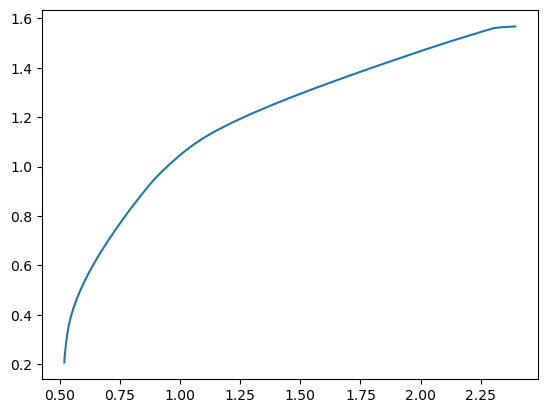

In [45]:
plt.plot(risk_values, return_values)